In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import openmdao.api as om

In [2]:
cr = om.CaseReader(os.path.join("sandbox_out", "case.sql"))
driver_cases = cr.list_cases('driver', out_stream=None)

objective_values = {}
constraint_values = {}
design_variables = {}

case_init = cr.get_case(driver_cases[0])
for k_obj in case_init.get_objectives().keys():
  objective_values[k_obj] = []
for k_cons in case_init.get_constraints().keys():
  constraint_values[k_cons] = []
for k_DV in case_init.get_design_vars().keys():
  design_variables[k_DV] = []

for case in [cr.get_case(v) for v in driver_cases]:
  for k_obj, v_obj in case.get_objectives().items():
    objective_values[k_obj].append(np.array(v_obj))
  for k_cons, v_cons in case.get_constraints().items():
    constraint_values[k_cons].append(np.array(v_cons))
  for k_DV, v_DV in case.get_design_vars().items():
    design_variables[k_DV].append(np.array(v_DV))

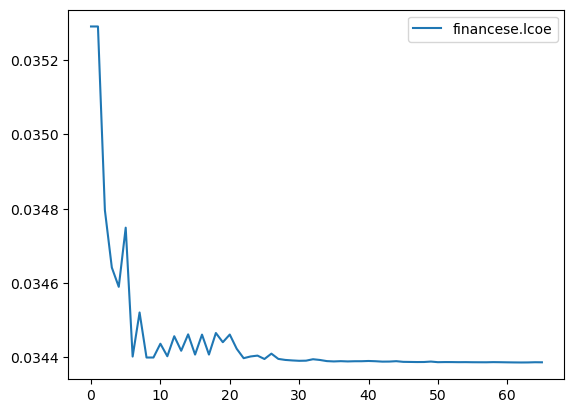

In [3]:
fig, ax = plt.subplots()
for name_obj, values_obj in objective_values.items():
  ax.plot(values_obj, label=name_obj)
ax.legend()

In [4]:
if constraint_values.keys():
  fig, axes = plt.subplots(len(constraint_values.keys()), 1, sharex=True)
  for idx_cons, (name_cons, values_cons) in enumerate(constraint_values.items()):
    axes[idx_cons].plot(values_cons, label=name_cons)
    axes[idx_cons].legend()

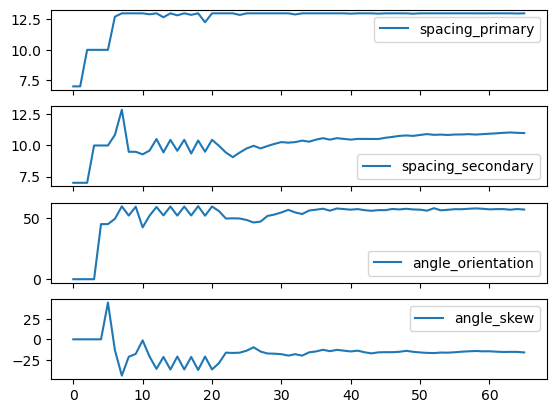

In [5]:
fig, axes = plt.subplots(len(design_variables.keys()), 1, sharex=True)
for idx_DV, (name_DV, values_DV) in enumerate(design_variables.items()):
  axes[idx_DV].plot(values_DV, label=name_DV)
  axes[idx_DV].legend()